In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [134]:
df = pd.read_excel('german_credit_data.xlsx')
print(df.shape)
df.head()

(1000, 10)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [136]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [137]:
df.describe(include=['object'])

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
count,1000,1000,817,606,1000,1000
unique,2,3,4,3,8,2
top,male,own,little,little,car,good
freq,690,713,603,274,337,700


In [138]:
df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [139]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

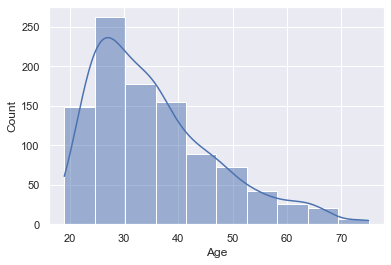

In [140]:
sns.histplot(data=df, x='Age', bins=10, kde=True)

C:\Users\eshad\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

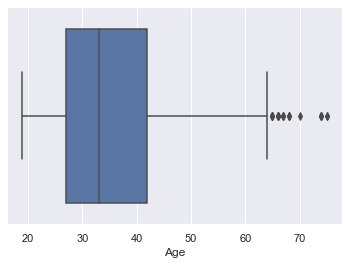

In [141]:
sns.boxplot(df.Age)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

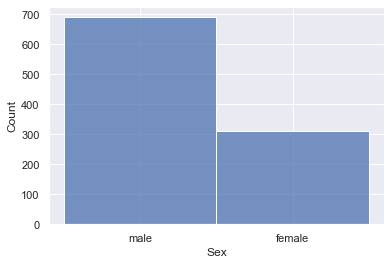

In [142]:
sns.histplot(data=df, x='Sex')

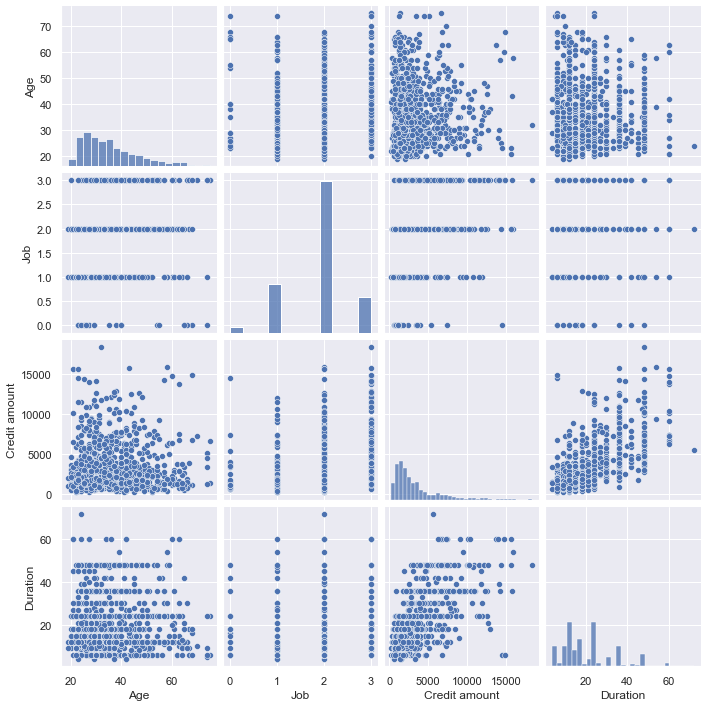

In [143]:
sns.pairplot(df)

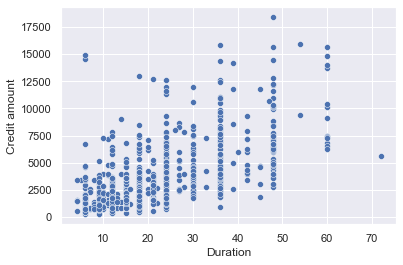

In [144]:
sns.scatterplot(data=df, x='Duration', y='Credit amount')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Credit amount'>

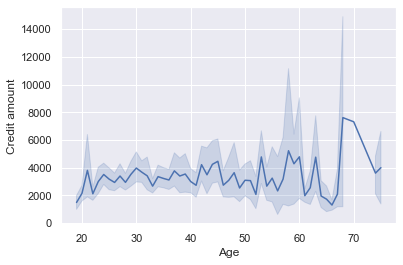

In [145]:
sns.lineplot(data=df, x='Age', y='Credit amount')

<AxesSubplot:xlabel='Checking account', ylabel='Credit amount'>

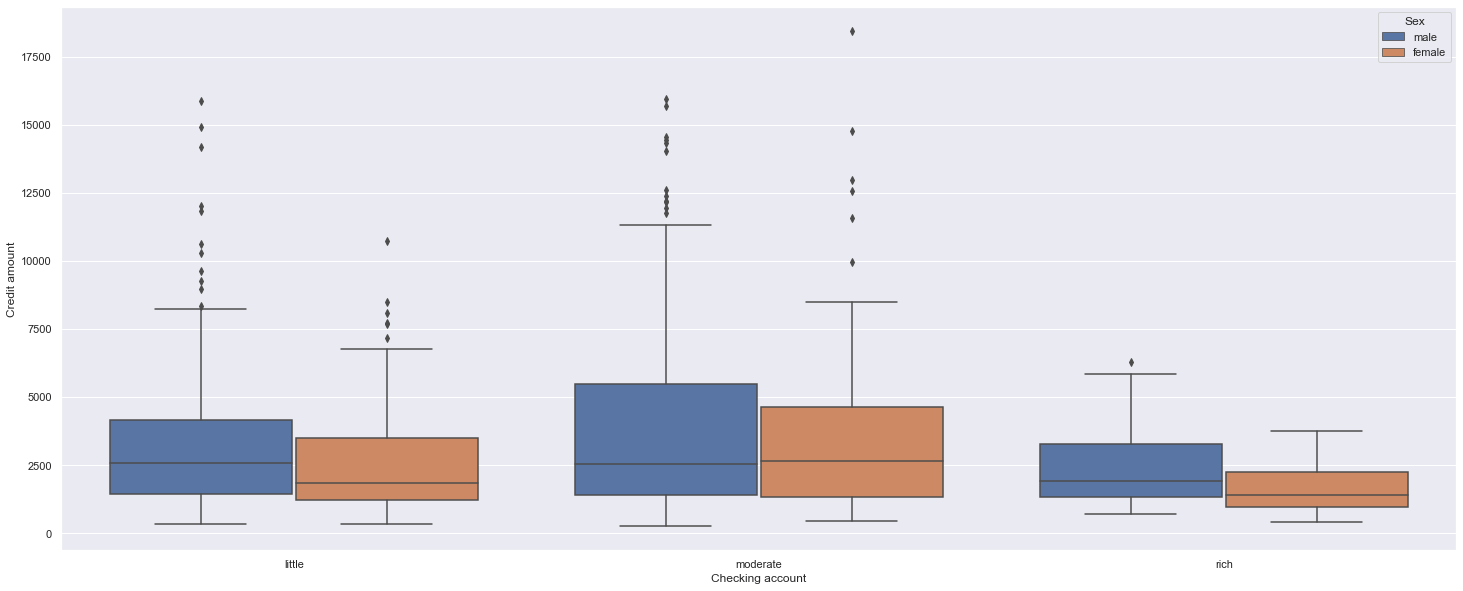

In [146]:
plt.figure(figsize=(25,10))
sns.boxplot(x="Checking account",y="Credit amount",hue='Sex',data=df)

# Performing one hot encoding for categorical variables

In [147]:
df['Saving accounts'].fillna('other',inplace=True)
df['Checking account'].fillna('other',inplace=True)
df['Housing']=df['Housing'].map({'own':0,'rent':1,'free':2})
df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Saving accounts']=df['Saving accounts'].map({'other' :1,'little':2,'moderate':3,'rich':4,'quite rich':5})
df['Checking account']=df['Checking account'].map({'other' :1,'little':2,'moderate':3,'rich':4})
df['Purpose']=df['Purpose'].map({'car':1,'radio/TV':2,'furniture/equipment':3,'business':4,'education':5,'repairs':6,'domestic appliances':7,'vacation/others':8})
df['Risk']=df['Risk'].map({'good':0,'bad':1})
df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0,2,0,1,2,1169,6,2,0
1,22,1,2,0,2,3,5951,48,2,1
2,49,0,1,0,2,1,2096,12,5,0
3,45,0,2,2,2,2,7882,42,3,0
4,53,0,2,2,2,2,4870,24,1,1
5,35,0,1,2,1,1,9055,36,5,0
6,53,0,2,0,5,1,2835,24,3,0
7,35,0,3,1,2,3,6948,36,1,0
8,61,0,1,0,4,1,3059,12,2,0
9,28,0,3,0,2,3,5234,30,1,1


# Performing histogram for numerical features

C:\Users\eshad\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

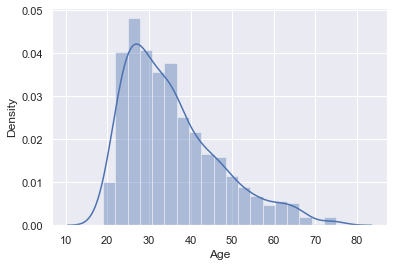

In [148]:
sns.distplot(df['Age'],kde=True)

C:\Users\eshad\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit amount', ylabel='Density'>

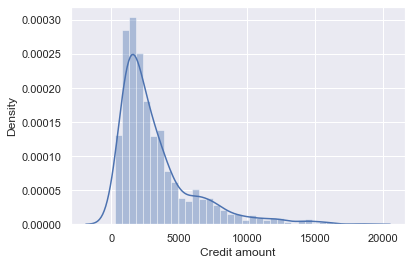

In [149]:
sns.distplot(df['Credit amount'],kde=True)

C:\Users\eshad\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration', ylabel='Density'>

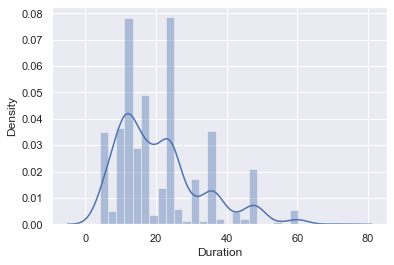

In [150]:
sns.distplot(df['Duration'],kde=True)

# From the above histograms it is evident that there is skewness in the data that needs to be eliminated

C:\Users\eshad\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

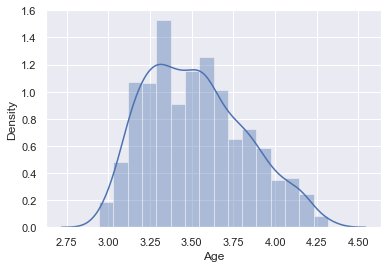

In [151]:
df['Age']=np.log(df['Age'])
sns.distplot(df["Age"],kde=True)

# Applying log transformation to eliminate skewness

C:\Users\eshad\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit amount', ylabel='Density'>

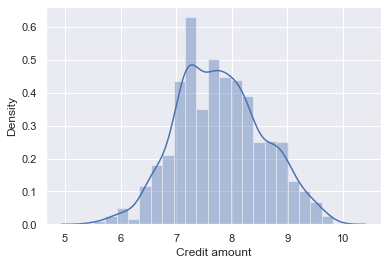

In [152]:
df['Credit amount']=np.log(df['Credit amount'])
sns.distplot(df["Credit amount"],kde=True)

C:\Users\eshad\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration', ylabel='Density'>

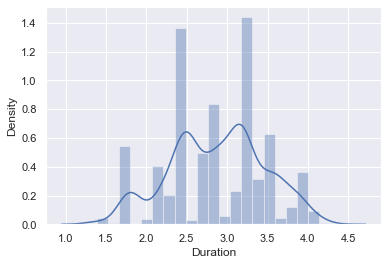

In [153]:
df['Duration']=np.log(df['Duration'])
sns.distplot(df["Duration"],kde=True)

# Applying Feature Scaling

In [156]:
from sklearn.preprocessing import StandardScaler

df_scaled=StandardScaler().fit_transform(df[['Age','Credit amount', 'Duration']])
df_scaled

array([[ 2.27100592, -0.933901  , -1.86486906],
       [-1.44615223,  1.16304581,  1.7083687 ],
       [ 1.22669602, -0.1815588 , -0.67378981],
       ...,
       [ 0.37810951, -1.4161991 , -0.67378981],
       [-1.29778048, -0.34591111,  1.59746802],
       [-0.76258638,  0.82450846,  1.59746802]])

In [157]:
df_scaled_frame = pd.DataFrame(df_scaled)

<AxesSubplot:ylabel='Density'>

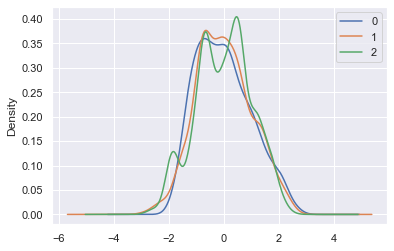

In [158]:
 df_scaled_frame.plot(kind='kde')

# Applying elbow method to find out best number of clusters

Text(0, 0.5, 'kmeans')

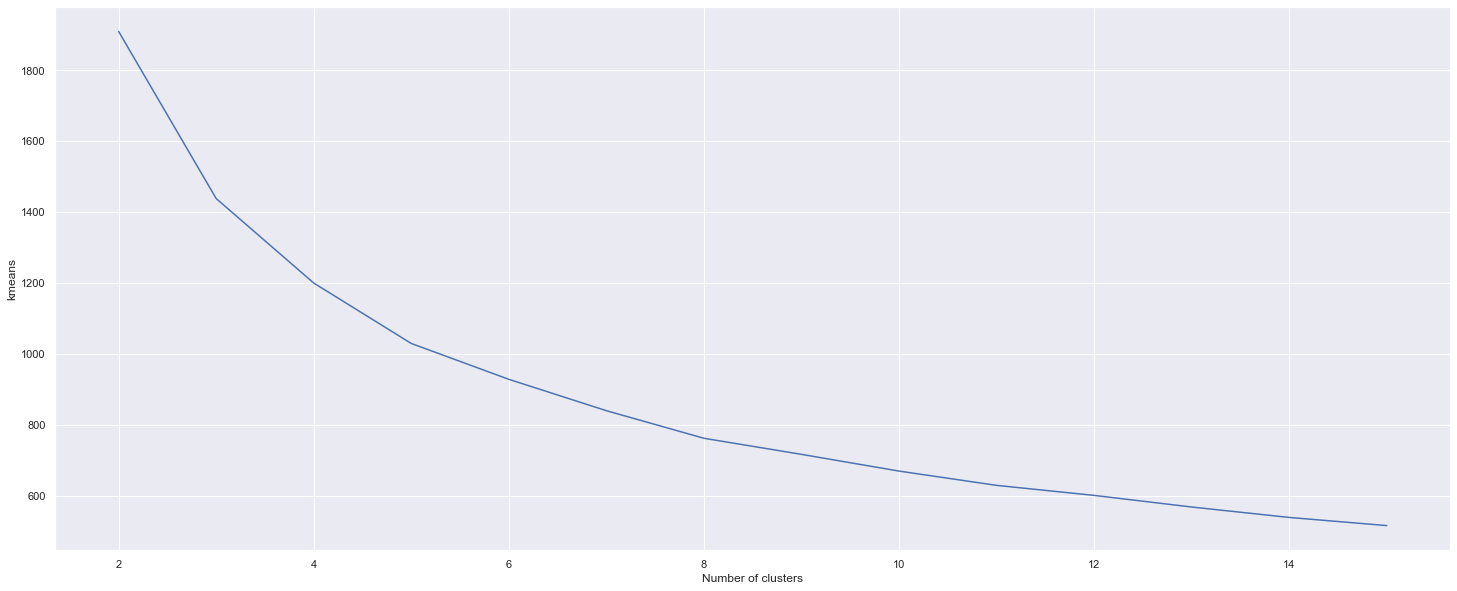

In [159]:
kmeans=[]
for i in range(2,16):
    km = KMeans(n_clusters = i, init = 'k-means++',random_state=42)
    km.fit(df_scaled_frame)
    kmeans.append(km.inertia_)
    cluster_labels = km.labels_
plt.figure(figsize=(25,10))
plt.plot(range(2,16),kmeans)
plt.xlabel("Number of clusters")
plt.ylabel("kmeans")

We can see from the above elbow curve that the optimal number of clusters is 4

# Choosing optimal number of clusters

In [160]:
km = KMeans(n_clusters=4, init='k-means++', max_iter=400, n_init=100, random_state=0)
y_m = km.fit(df_scaled_frame)
y_m

KMeans(max_iter=400, n_clusters=4, n_init=100, random_state=0)

Variance: [0.5408953  0.33457078 0.12453391]


C:\Users\eshad\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


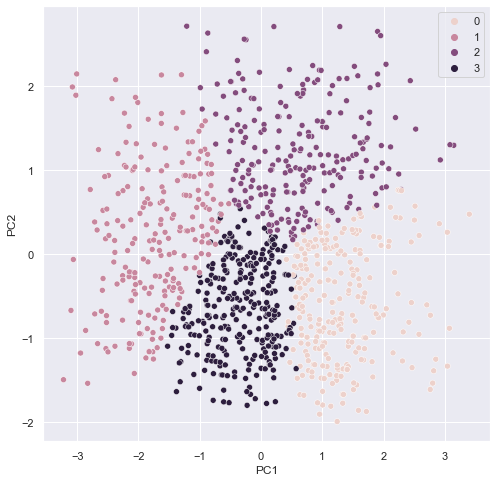

In [162]:
pca = PCA(n_components=3).fit(df_scaled_frame)
pcad = pca.transform(df_scaled_frame)

print("Variance:",pca.explained_variance_ratio_)

plt.figure(figsize = (8,8))
sns.scatterplot(pcad[:,0], pcad[:,1], 
                hue=y_m.labels_)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [163]:
from sklearn.model_selection import train_test_split
X=df.drop(columns = "Risk", axis = 1)
y=df["Risk"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 1.Implementing KFoldCV using RandomForestClassifier
## 2.Evaluation metrics of the model

In [164]:
model = RandomForestClassifier()
kfold = KFold(n_splits=5)

result = cross_val_score(model, X, y, cv=kfold)
Accuracy = result.mean()*100
PW = cross_val_score(model, X, y, cv=kfold, scoring='precision_weighted')
Rscore = cross_val_score(model, X, y, cv=kfold, scoring='recall_weighted')
Recall = Rscore.mean()*100
Precision = PW.mean()*100
f1score=2*((Recall*Precision)/(Recall+Precision))
print('Precision: {} / Recall: {} / Accuracy: {}/ F1 Score: {}'.format(
    round(Precision, 3), round(Recall,3), round(Accuracy,3), round(f1score,3)))

Precision: 73.098 / Recall: 74.4 / Accuracy: 73.6/ F1 Score: 73.743
